In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
# import xgboost as xgb
# from keras import Model
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# from keras.optimizers import Adam
# from keras.regularizers import l2, l1
from imblearn.combine import SMOTETomek
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
# from keras.layers import (
#     Bidirectional,
#     LSTM,
#     Dense,
#     Dropout,
#     BatchNormalization,
#     Input,
#     Activation,
# )

## Training Data

In [107]:
df_train = pd.read_csv("./clean_train.csv")
df_train.head()

,Tenure,Matric,Degree,Diploma,Female,Sa_citizen,Birthyear,Birthmonth,Target,Year_survey,...,Home_lang_70_79,Home_lang_80_100,Home_lang_nan,Science_30_39,Science_40_49,Science_50_59,Science_60_69,Science_70_79,Science_80_100,Science_nan
0,0.0,1.0,0.0,0.0,1,1,2000,5,0,2022,...,False,False,True,False,False,False,False,False,False,False
1,427.0,1.0,0.0,0.0,1,1,1989,4,1,2023,...,False,False,True,True,False,False,False,False,False,False
2,0.0,1.0,0.0,0.0,0,1,1996,7,1,2022,...,False,False,True,True,False,False,False,False,False,False
3,810.0,0.0,0.0,0.0,0,1,2000,1,0,2022,...,False,False,True,False,False,False,False,False,False,True
4,0.0,0.0,0.0,0.0,1,1,1998,12,0,2023,...,False,False,True,False,False,False,False,False,False,True


<Axes: xlabel='Target'>

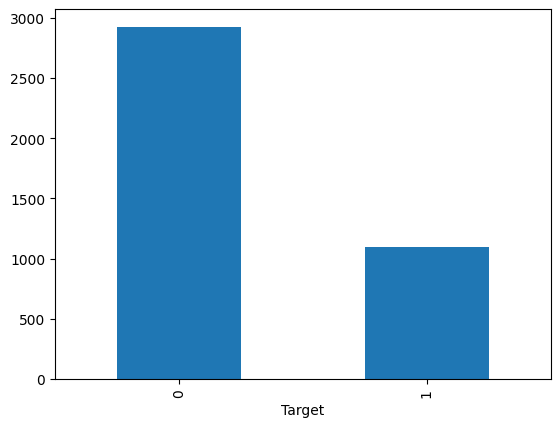

In [108]:
df_train['Target'].value_counts().plot(kind='bar')

In [109]:
train = df_train.drop('Target', axis=1)
targets = df_train['Target']

train.shape, targets.shape

((4020, 73), (4020,))

## Class Imbalance

In [110]:
# def min_max_scaling(column):
#     min_val = column.min()
#     max_val = column.max()
#     scaled_column = (column - min_val) / (max_val - min_val)
#     return scaled_column

# # scale all columns [0-1]
# train = train.iloc[:, :].apply(min_max_scaling)
# train.head()

In [111]:
train = train.drop(['Round_nan', 'Status_nan', 'Geography_nan', 'Province_nan'], axis=1)
train.head()

,Tenure,Matric,Degree,Diploma,Female,Sa_citizen,Birthyear,Birthmonth,Year_survey,Age_survey,...,Home_lang_70_79,Home_lang_80_100,Home_lang_nan,Science_30_39,Science_40_49,Science_50_59,Science_60_69,Science_70_79,Science_80_100,Science_nan
0,0.0,1.0,0.0,0.0,1,1,2000,5,2022,22,...,False,False,True,False,False,False,False,False,False,False
1,427.0,1.0,0.0,0.0,1,1,1989,4,2023,34,...,False,False,True,True,False,False,False,False,False,False
2,0.0,1.0,0.0,0.0,0,1,1996,7,2022,26,...,False,False,True,True,False,False,False,False,False,False
3,810.0,0.0,0.0,0.0,0,1,2000,1,2022,22,...,False,False,True,False,False,False,False,False,False,True
4,0.0,0.0,0.0,0.0,1,1,1998,12,2023,25,...,False,False,True,False,False,False,False,False,False,True


In [112]:
# tl_us = TomekLinks(sampling_strategy='majority')
tl_us = SMOTETomek(random_state=42, sampling_strategy = 1.0)
x_resample,y_resample = tl_us.fit_resample(train, targets )
#
x_resample.shape,y_resample.value_counts()

((5714, 69),
 Target
 0    2857
 1    2857
 Name: count, dtype: int64)

Target
0    2857
1    2857
Name: count, dtype: int64


/Users/aapoh/codes/ghp/zindi-piyipc/env-zindi/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aapoh/codes/ghp/zindi-piyipc/env-zindi/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aapoh/codes/ghp/zindi-piyipc/env-zindi/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


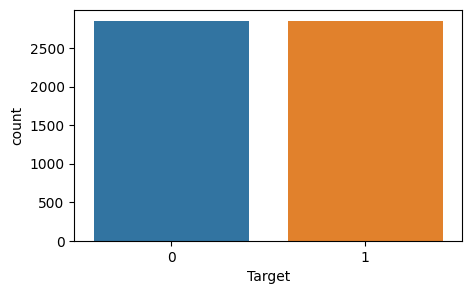

In [113]:
print(y_resample.value_counts())
#
plt.figure(figsize=(5, 3))
sns.countplot(x=y_resample)
plt.show()

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=42)

x_train.shape, y_train.shape

((4571, 69), (4571,))

## Test Data

In [115]:
# clean data
test_data = pd.read_csv("./clean_test.csv")
test_data.head()

,Tenure,Matric,Degree,Diploma,Female,Sa_citizen,Birthyear,Birthmonth,Year_survey,Age_survey,...,Home_lang_70_79,Home_lang_80_100,Home_lang_nan,Science_30_39,Science_40_49,Science_50_59,Science_60_69,Science_70_79,Science_80_100,Science_nan
0,0.0,1.0,0.0,0.0,0,1,2002,12,2022,20,...,False,False,True,False,True,False,False,False,False,False
1,979.0,1.0,0.0,0.0,1,1,1989,12,2023,34,...,False,False,True,False,False,False,False,False,False,True
2,339.0,0.0,0.0,0.0,1,1,1989,12,2023,34,...,False,False,True,False,False,False,False,False,False,True
3,0.0,1.0,0.0,0.0,0,1,2002,11,2023,21,...,False,False,True,False,False,False,False,False,False,True
4,613.0,0.0,0.0,0.0,1,1,1993,10,2023,30,...,False,False,True,False,False,False,False,False,False,True


In [116]:
test_data = test_data.drop(['Round_nan', 'Status_nan', 'Geography_nan', 'Province_nan'], axis=1)
test_data.head()

,Tenure,Matric,Degree,Diploma,Female,Sa_citizen,Birthyear,Birthmonth,Year_survey,Age_survey,...,Home_lang_70_79,Home_lang_80_100,Home_lang_nan,Science_30_39,Science_40_49,Science_50_59,Science_60_69,Science_70_79,Science_80_100,Science_nan
0,0.0,1.0,0.0,0.0,0,1,2002,12,2022,20,...,False,False,True,False,True,False,False,False,False,False
1,979.0,1.0,0.0,0.0,1,1,1989,12,2023,34,...,False,False,True,False,False,False,False,False,False,True
2,339.0,0.0,0.0,0.0,1,1,1989,12,2023,34,...,False,False,True,False,False,False,False,False,False,True
3,0.0,1.0,0.0,0.0,0,1,2002,11,2023,21,...,False,False,True,False,False,False,False,False,False,True
4,613.0,0.0,0.0,0.0,1,1,1993,10,2023,30,...,False,False,True,False,False,False,False,False,False,True


In [117]:
# test_data = test_data.iloc[:, :].apply(min_max_scaling)
# test_data.head()

## Models

#### Naive Bayes Gaussian

In [118]:
# NB
grid_search_params = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

cls_gnb = GaussianNB()

grid_search = GridSearchCV(
    estimator=cls_gnb, param_grid=grid_search_params, cv=10, scoring="accuracy"
)

grid_search.fit(x_train, y_train)

print(f"{grid_search.best_params_}\n\n")
print(f"{grid_search.best_estimator_}")

{'var_smoothing': 1e-07}


GaussianNB(var_smoothing=1e-07)


In [119]:
# perform cross val on data
model = GaussianNB(var_smoothing=1e-07)
cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)
scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
print(f"mean score: {scores.mean()}")

mean score: 0.779694800913495


In [120]:
model.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-07)

#### SVM - SVC

In [121]:
# # svc takes times
# # "C": [0.08, 0.05, 0.03, 0.01, 0.1, 1, 3, 5, 7, 10],
# grid_search_params = {
#     "C": [0.01, 0.05, 0.1, 1, 5, 10],
#     "kernel": ["linear", "rbf", "poly", "sigmoid"],
#     "degree": [2, 3, 4, 5],
#     "gamma": ["scale", "auto"] + [0.001, 0.01, 0.1, 1],
# }

# cls_svc = SVC()

# grid_search = GridSearchCV(
#     estimator=cls_svc, param_grid=grid_search_params, cv=5, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

#### Deep Learning

In [122]:
# # remove province nan
# dl_data = np.array( train.drop('Province_nan', axis=1)).astype(np.float32)
# dl_data = dl_data.reshape(dl_data.shape[0], 9, -1 )
# dl_data.shape

In [123]:
# dl_labels = np.array(targets)
# np.unique( dl_labels)

In [124]:
# input_shape = (9, 8)

# input_layer = Input(shape=input_shape)

# # units = [256, 128, 64, 32]
# x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=(l2(0.01)) ))(input_layer)
# x = LSTM(64, return_sequences=True, kernel_regularizer=(l2(0.01)))(input_layer)
# # x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# #
# x = Bidirectional(LSTM(32, return_sequences=True, kernel_regularizer=(l2(0.01))))(x)
# # x = LSTM(32, return_sequences=True, kernel_regularizer=(l2(0.01)))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# #
# x = Bidirectional(LSTM(16, return_sequences=True, kernel_regularizer=(l2(0.01))))(x)
# # x = LSTM(16, return_sequences=True, kernel_regularizer=(l2(0.01)))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)

# output_layer = Dense(1, activation="sigmoid")(x)

# model = Model(inputs=input_layer, outputs=output_layer)

# #
# learning_rate = 0.001
# optim_ = Adam(learning_rate=learning_rate)

# #
# model.compile(optimizer=optim_, loss="binary_crossentropy", metrics=["accuracy"])

# model.summary()

In [125]:
# dl_labels = np.asarray(dl_labels).astype('int').reshape((-1,1))

In [126]:
# model.fit(dl_data, dl_labels, batch_size=32, epochs=10, validation_split=0.2)

In [127]:
# # remove province nan
# dl_test_data = np.array( test_data.drop('Province_nan', axis=1)).astype(np.float32)
# dl_test_data = dl_test_data.reshape(dl_test_data.shape[0], 9, -1 )
# dl_test_data.shape

# y_pred = model.predict(dl_test_data)

In [128]:
# y_pred = np.squeeze(y_pred)
# predictions= ( y_pred >= .5).astype('int')[:,0]
# predictions

#### Multinomial NB

In [129]:
# # NB
# grid_search_params = {
#     "alpha": [0.1, 0.5, 1.0, 2.0],
#     "fit_prior": [True, False],
# }

# cls_mnb = MultinomialNB()

# grid_search = GridSearchCV(
#     estimator=cls_mnb, param_grid=grid_search_params, cv=30, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"Best Params: {grid_search.best_params_}")
# print(f"Best Estimator: {grid_search.best_estimator_}")
# print(f"Best Score: {grid_search.best_score_}")

In [130]:
# cls_mnb.fit(train, targets)

In [131]:
# predictions = cls_mnb.predict(test_data)
# predictions

#### Random Forest Classifier

In [132]:
# grid_search_params = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
# }

# cls_rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(
#     estimator=cls_rf, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# # print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [133]:
# rf = RandomForestClassifier(
#     random_state=42, max_depth=30, min_samples_leaf=2, min_samples_split=5
# )

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(rf, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [134]:
# rf.fit(train, targets)
# predictions = rf.predict(test_data)
# predictions

#### KNN

In [135]:
# grid_search_params = {
#     "n_neighbors": [3, 5, 7, 9],
#     "weights": ["uniform", "distance"],
#     "p": [1, 2],
#     # "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
# }

# cls_knn = KNeighborsClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_knn, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# # print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [136]:
# knn = KNeighborsClassifier( n_neighbors=5, weights="distance", p=2 )

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(knn, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [137]:
# knn.fit(train, targets)
# predictions = knn.predict(test_data)
# predictions

#### DecisionTreeClassifier

In [138]:
# grid_search_params = {
#     "criterion": ["gini", "entropy"],
#     "max_depth": [None, 5, 10, 15, 20],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
# }

# cls_dt = DecisionTreeClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_dt, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [139]:
# dt = DecisionTreeClassifier(
#     criterion="gini", max_depth=10, min_samples_leaf=4, min_samples_split=5
# )
# # dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(dt, train, targets, cv=cv, scoring="accuracy")

# print(f"mean score: {scores.mean()}")

In [140]:
# dt.fit(train, targets)
# predictions = dt.predict(test_data)
# predictions

#### SGDClassifier

In [141]:
# grid_search_params = {
#     "loss": ["hinge", "log", "modified_huber"],
#     "penalty": ["none", "l1", "l2", "elasticnet"],
#     "alpha": [0.0001, 0.001, 0.01, 0.1],
#     "max_iter": [1000, 2000, 3000],
# }

# cls_sdg = SGDClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_sdg, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# # # print(f"{grid_search.best_params_}\n\n")
# # print(f"{grid_search.best_estimator_}")

In [142]:
# sgd = SGDClassifier(alpha=0.001, loss='modified_huber', max_iter=3000,penalty='elasticnet')

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(sgd, train, targets, cv=cv, scoring='accuracy')

# print(f"mean score: {scores.mean()}")

In [143]:
# sgd.fit(train, targets)
# predictions = sgd.predict(test_data)
# predictions

#### DecisionTreeRegressor

In [144]:
# grid_search_params = {
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
# }

# cls_dt_reg = DecisionTreeRegressor()

# grid_search = GridSearchCV(
#     estimator=cls_dt_reg, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [145]:
# dt_reg = DecisionTreeRegressor()
# # dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5)

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(dt_reg, train, targets, cv=cv, scoring="accuracy")

# print(f"mean score: {scores.mean()}")

In [146]:
# dt.fit(train, targets)
# predictions = dt.predict(test_data)
# predictions

#### MLPClassifier

In [147]:
# grid_search_params = {
#     "hidden_layer_sizes": [(64,), (128,), (256,)],
#     "activation": ["relu", "tanh"],
#     "alpha": [0.0001, 0.001, 0.01],
# }


# cls_mlp = MLPClassifier()

# grid_search = GridSearchCV(
#     estimator=cls_mlp, param_grid=grid_search_params, cv=10, scoring="accuracy"
# )

# grid_search.fit(train, targets)

# print(f"{grid_search.best_params_}\n\n")
# print(f"{grid_search.best_estimator_}")

In [148]:
# # mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(64,))
# mlp = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(256,), random_state=1)
# # mlp = MLPClassifier()

# cv = StratifiedKFold(random_state=42, n_splits=10, shuffle=True)

# scores = cross_val_score(mlp, train, targets, cv=cv, scoring="accuracy")

# print(f"mean score: {scores.mean()}")

In [149]:
# mlp.fit(train, targets)
# predictions = mlp.predict(test_data)
# predictions

## Model Evaluation

In [150]:
y_preds = model.predict(x_test)

In [151]:
f1_score(y_test, y_preds)

0.7337526205450734

In [152]:
print(classification_report(y_test, y_preds, zero_division=1))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       584
           1       0.89      0.63      0.73       559

    accuracy                           0.78      1143
   macro avg       0.80      0.77      0.77      1143
weighted avg       0.80      0.78      0.77      1143



In [167]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[539,  45],
       [209, 350]])

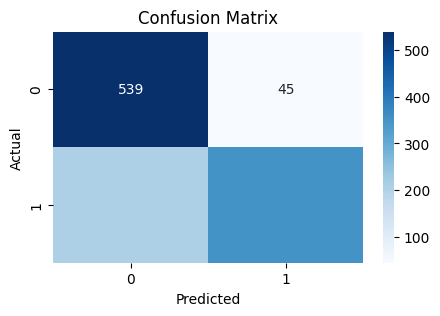

In [165]:
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Save to file

In [154]:
# predictions = model.predict(test_data)
# predictions

In [155]:
# # # unclean data
# submit_sample = pd.read_csv("./SampleSubmission.csv")
# submit_sample.head()

In [156]:
# df_submission = pd.DataFrame({"Person_id": submit_sample["Person_id"], "Target": predictions.astype(int)})
# df_submission.head()

In [157]:
# df_submission.to_csv("submission.csv", index=False)